In [4]:
import numpy as np
import torch
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 2)

Для разминки:
###  Задание 1

Посчитай направление наибольшего роста функции $f(x, y) = 3x^2 + y^2$ в точке $z_0 = (1, 3)$.

###  Задание 2

Найди минимум функции $f(x, y) = 3x^2 + y^2$.

## Высокоуровневый PyTorch

В этом ноутбуке мы не будем вручную создавать переменные и вручную считать производные. В торче есть много абстракций и инструментов, которые облегчают жизнь (хоть и вручную можно создать что угодно)

Самая главная из них это nn.Module.Посмотрим на его документацию:

In [5]:
from torch import nn
import torch.nn.functional as F

print(nn.Module.__doc__)

Base class for all neural network modules.

    Your models should also subclass this class.

    Modules can also contain other Modules, allowing to nest them in
    a tree structure. You can assign the submodules as regular attributes::

        import torch.nn as nn
        import torch.nn.functional as F

        class Model(nn.Module):
            def __init__(self):
                super().__init__()
                self.conv1 = nn.Conv2d(1, 20, 5)
                self.conv2 = nn.Conv2d(20, 20, 5)

            def forward(self, x):
                x = F.relu(self.conv1(x))
                return F.relu(self.conv2(x))

    Submodules assigned in this way will be registered, and will have their
    parameters converted too when you call :meth:`to`, etc.

    .. note::
        As per the example above, an ``__init__()`` call to the parent class
        must be made before assignment on the child.

    :ivar training: Boolean represents whether this module is in training or
         

Для удобства сделано, что все архитектуры ("модули") написанные вами на pytorch-e должны быть отнаследованы от nn.Module.

Каждый модуль -- это нечто, что принимает на вход какие-то тензоры, и возвращает какие-то тензоры. Это как раз forward pass -- его и нужно описывать в методе `forward`. В примере выше описана нейросеть, в которой два слоя (self.conv1 и self.conv2). В forward() описана логика того, как должен быть предобработан входной тензор `x`. 
В примере выше сначала применяется первый слой, потом функция активации, потом второй слой, а потом еще раз функция активации.

Многие классы из torch.nn являются наследниками `nn.Module`-я -- их и рекомендуется использовать в качестве "строительных блоков" вашей нейросети.

#### nn.Module

In [14]:
class Block(nn.Module):
    def __init__(self):
        super().__init__()  # не стоит забывать так писать
        self.linear_first = nn.Linear(64, 64)
        self.activation = nn.ReLU()
        self.linear_second = nn.Linear(64, 1)
    
    def forward(self, inp: torch.Tensor) -> torch.Tensor:
        result = self.linear_first(inp)
        result = self.activation(result)
        result = self.linear_second(result)
        result = self.activation(result) 
        return result

In [15]:
block = Block()

In [16]:
inp = torch.ones(100, 64) 

In [17]:
# nn.Module-и можно вызывать прямо так, и под капотом будет вызвано то, что реализовано в методе .forward()
block(inp)

tensor([[0.0425],
        [0.0425],
        [0.0425],
        [0.0425],
        [0.0425],
        [0.0425],
        [0.0425],
        [0.0425],
        [0.0425],
        [0.0425],
        [0.0425],
        [0.0425],
        [0.0425],
        [0.0425],
        [0.0425],
        [0.0425],
        [0.0425],
        [0.0425],
        [0.0425],
        [0.0425],
        [0.0425],
        [0.0425],
        [0.0425],
        [0.0425],
        [0.0425],
        [0.0425],
        [0.0425],
        [0.0425],
        [0.0425],
        [0.0425],
        [0.0425],
        [0.0425],
        [0.0425],
        [0.0425],
        [0.0425],
        [0.0425],
        [0.0425],
        [0.0425],
        [0.0425],
        [0.0425],
        [0.0425],
        [0.0425],
        [0.0425],
        [0.0425],
        [0.0425],
        [0.0425],
        [0.0425],
        [0.0425],
        [0.0425],
        [0.0425],
        [0.0425],
        [0.0425],
        [0.0425],
        [0.0425],
        [0.0425],
        [0

In [18]:
block(inp).shape

torch.Size([100, 1])

Рассмотрим другой способ создать ту же самую нейросеть с помощью строительного блока `nn.Sequential`. Он сделан для того, чтобы применять подряд другие блоки, например:

In [19]:
block_seq = nn.Sequential(
    nn.Linear(64, 64),  # линейный слой 64 признака в 64 признака
    nn.ReLU(),  # функция активации
    nn.Linear(64, 1),  # линейный слой 64 признака в 1 признак
    nn.ReLU(),  #  еще одна функция активации
)

In [20]:
block_seq(inp)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
      

In [21]:
block_seq(inp).shape

torch.Size([100, 1])

In [22]:
torch.allclose(block(inp), block_seq(inp))

False

**Почему в последней ячейке вывелось False?**. Веса нейронной сети для хорошей оптимизации обычно инициализируют рандомно, причем инициализация должна быть *правильной*.
В торче стратегии инициализации весов уже реализованы за вас, и если объявлять модули, то веса модуля уже будут рандомно инициализированы. Так как они рандомно инициализированы, то и выход двух заново созданных модулей (`block` и `block_seq`) будет разным.

#### Optimizers

In [23]:
from torch.optim import SGD

В pytorch так же есть реализации наиболее известных оптимизаторов -- например, стохастический градиентный спуск.
Чтобы инициализировать почти любой оптимизатор, ему нужно передать список из тензоров (или словарей тензоров), которые нужно оптимизировать.
Чтобы получить веса nn.Module нужно вызвать у него метод parameters()
Так, чтобы оптимизировать веса `block`-а, подойдет например вот такой оптимизатор:

In [24]:
optimizer = SGD(block.parameters(), lr=0.05)
#  сюда мы так же передали lr -- наш learning-rate

In [25]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.05
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

Теперь нам хватает знаний, чтобы закодить логистическую регрессию, которая отличает букву A на картинке от буквы B

In [26]:
# если клетка падает, то просто перезапусти
from notmnist import load_notmnist


X_train, y_train, X_test, y_test = load_notmnist(letters='AB')
X_train, X_test = X_train.reshape([-1, 784]), X_test.reshape([-1, 784])

print(f"Train size  = {len(X_train):11}, test_size  = {len(X_test)}")
print(f"Train shape = {X_train.shape}, test_shape = {X_test.shape:}")

Parsing...
found broken img: ./notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png [it's ok if &lt;10 images are broken]
Done
Train size  =        2808, test_size  = 937
Train shape = (2808, 784), test_shape = (937, 784)


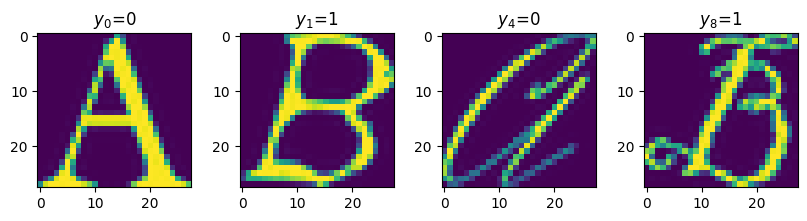

In [27]:
indeces = [0, 1, 4, 8]
for i, ind in enumerate(indeces):
    plt.subplot(1, len(indeces), i + 1)
    plt.imshow(X_train[ind].reshape([28, 28]))
    plt.title(f'$y_{ind}$=' + str(y_train[ind]))

In [28]:
model = nn.Sequential(
    nn.Linear(784, 1),  # на вход картинки 28 на 28 -- ровно 784 значения
    nn.Sigmoid(),  # на выход числа от 0 до 1, где 1 -- вероятность того, что на картинке B
)

Посмотрим на параметры модели:

In [29]:
print("Weight shapes:", [w.shape for w in model.parameters()])

Weight shapes: [torch.Size([1, 784]), torch.Size([1])]


In [30]:
# тензор размера 3 на 784 -- ровно три первых картинки из тренировочной выборки
x = torch.tensor(X_train[:3], dtype=torch.float32)

# тензор размера 3 -- ровно три первых ответа из тренировочной выборки
y = torch.tensor(y_train[:3], dtype=torch.float32)

# то, что предсказывает необученная модель
y_predicted = model(x)[:, 0]

y_predicted

tensor([0.2675, 0.4357, 0.8015], grad_fn=<SelectBackward0>)

Для обучения необходимо вычислить функцию ошибки. В данном случае подходит лог-лосс, или бинарная кросс-энтропия. Вы реализовали ровно в одной из функций из начала этой тетрадки :) Воспользуйтесь ей, чтобы посчитать лосс

In [ ]:
# <YOUR-CODE-HERE>

loss = log_loss(y_predicted, y)
loss

In [ ]:
assert tuple(loss.size()) == tuple(), "Лосс должен быть скаляром"
assert loss.data.numpy() > 0, "лог лосс должен быть больше нуля, ноль -- только для идеального предсказания"
assert loss.data.numpy() <= np.log(3), "Лосс слишком большой для нетренированной модели. Пожалуйста, перепроверьте его"

In [33]:
optimizer = SGD(model.parameters(), lr=0.05)  # создаем оптимизатор
#  теперь как им пользоваться:

In [42]:
loss = log_loss(y_predicted, y)  # посчитали значение (скаляр), которое хотим минимизировать
loss.backward()  # теперь у каждой переменной, где require_grad=True, есть градиент (производная). Для всех параметров нашего модуля это выполнено
optimizer.step()  # делаем шаг градиентного спуска
optimizer.zero_grad()  # очищаем параметры от уже посчитанных градиентов, чтобы те не мешали нам на следующих шагах

# и да, это надо делать в цикле, который называется training_loop

#### Теперь всё вместе

In [43]:
model = nn.Sequential(
    nn.Linear(784, 1),
    nn.Sigmoid(),
)
optimizer = SGD(model.parameters(), lr=0.05)

In [ ]:
history = []

# итерируемся по мини-батчам в цикле
for X_batch, y_batch in <YOUR CODE>:
    
    # предскажи вероятности
    <YOUR CODE>

    assert y_predicted.dim() == 1, "вы забыли второе измерение с помощью [:, 0]"

    # посчитай лосс
    # <YOUR CODE>

    # посчитай градиенты
    <YOUR CODE>

    # шаг градиентного спуска
    <YOUR CODE>
    

    # чистим градиенты
    <YOUR CODE>

    if i % 5 == 0:
        print("step #%i | mean loss = %.3f" % (i, np.mean(history[-10:])))

Тестируем:

In [45]:
# посчитай качество на валидационной выборке

accuracy = <YOUR CODE>

print("Test accuracy: %.5f" % accuracy)
assert accuracy > 0.94, "попробуй потренировать подольше"

Test accuracy: 0.94237


## Бонус 1

Попробуй добиться того, чтобы accuracy на тестовой выборке стала больше чем 0.96 (для этого можно модицифировать архитектуру нейросети, менять параметры выше). Копипастить из этой же тетрадки или других можно :)

## Бонус 2. MLP + регрессия

Попробуй построить нейросеть, которая решает задачу регрессии для датасета House Prices.

In [ ]:
# https://www.kaggle.com/c/house-prices-advanced-regression-techniques
features = ['LotArea', 'TotalBsmtSF', 'GrLivArea', '1stFlrSF', '2ndFlrSF']
data = pd.read_csv('./house_prices.csv')[features + ['SalePrice']]

train, valid = train_test_split(data, test_size=0.33, random_state=42)

X_train = train[features].values
y_train = train['SalePrice'].values[..., np.newaxis]

X_valid = valid[features].values
y_valid = valid['SalePrice'].values[..., np.newaxis]

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

y_train_std = y_train.std()
y_train = y_train / y_train_std
y_valid = y_valid / y_train_std